In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import seaborn as sns

In [2]:
data = pd.read_csv("Project_2.csv")
data

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,2021-07-04 00:00:00,1787.22,1787.73,1785.00,1786.39,-83,-0.05
1,2021-07-05 00:00:00,1786.68,1794.00,1783.80,1791.15,447,0.25
2,2021-07-06 00:00:00,1790.85,1814.89,1789.89,1795.68,483,0.27
3,2021-07-07 00:00:00,1795.28,1809.50,1793.41,1803.22,794,0.44
4,2021-07-08 00:00:00,1803.29,1818.00,1793.90,1803.75,46,0.03
...,...,...,...,...,...,...,...
617,2023-06-29 00:00:00,1909.47,1913.00,1893.16,1908.76,-71,-0.04
618,2023-06-30 00:00:00,1908.71,1922.61,1900.57,1919.20,1049,0.55
619,2023-07-02 00:00:00,1920.30,1920.30,1917.50,1917.70,-260,-0.14
620,2023-07-03 00:00:00,1917.70,1930.50,1910.11,1921.17,347,0.18


In [3]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          622 non-null    object 
 1   Open          622 non-null    float64
 2   High          622 non-null    float64
 3   Low           622 non-null    float64
 4   Close         622 non-null    float64
 5   Change(Pips)  622 non-null    int64  
 6   Change(%)     622 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 34.1+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,1833.470354,1844.208939,1822.538248,1833.592749,12.239550,0.003617
std,94.417731,95.163303,93.223079,94.345885,1480.617616,0.804528
min,1627.270000,1640.760000,1615.040000,1626.890000,-5559.000000,-3.050000
25%,1775.080000,1787.085000,1765.435000,1774.957500,-704.000000,-0.380000
50%,1815.230000,1826.375000,1808.335000,1815.470000,11.500000,0.005000
75%,1913.792500,1924.717500,1896.670000,1914.700000,749.500000,0.410000
max,2052.780000,2071.320000,2030.770000,2051.930000,6612.000000,3.330000


In [6]:
data=data.drop_duplicates()
data.head(5)

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,2021-07-04 00:00:00,1787.22,1787.73,1785.00,1786.39,-83,-0.05
1,2021-07-05 00:00:00,1786.68,1794.00,1783.80,1791.15,447,0.25
2,2021-07-06 00:00:00,1790.85,1814.89,1789.89,1795.68,483,0.27
3,2021-07-07 00:00:00,1795.28,1809.50,1793.41,1803.22,794,0.44
4,2021-07-08 00:00:00,1803.29,1818.00,1793.90,1803.75,46,0.03


In [7]:
data["Date"]=pd.to_datetime(data["Date"])
data.set_index('Date', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 622 entries, 2021-07-04 to 2023-07-04
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          622 non-null    float64
 1   High          622 non-null    float64
 2   Low           622 non-null    float64
 3   Close         622 non-null    float64
 4   Change(Pips)  622 non-null    int64  
 5   Change(%)     622 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 34.0 KB


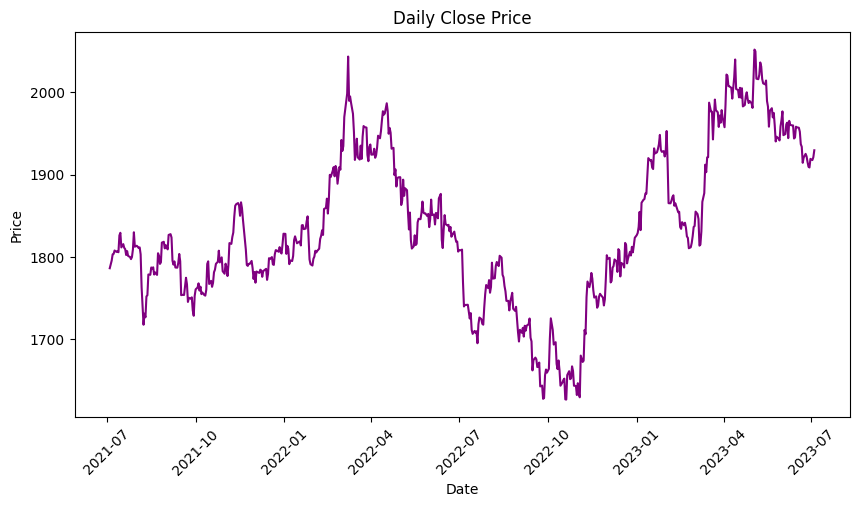

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date",y="Close",data=data,color="purple")
plt.title("Daily Close Price")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

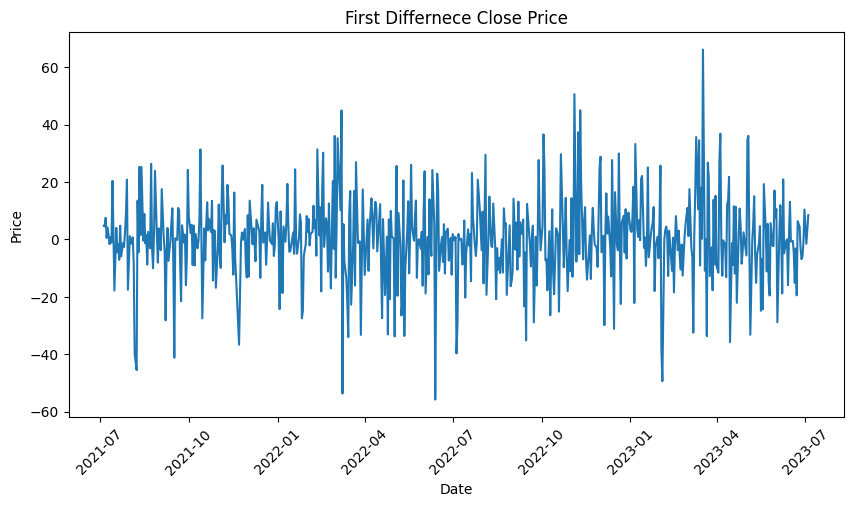

In [10]:
first_difference=data["Close"].diff()[1:]
plt.figure(figsize=(10,5))
plt.plot(first_difference)
plt.title("First Differnece Close Price")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

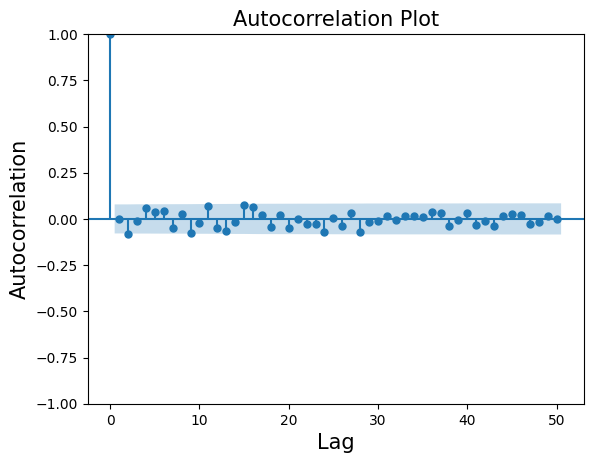

In [53]:
acf_plot=plot_acf(first_difference,lags=50)
plt.ylabel('Autocorrelation', fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.title("Autocorrelation Plot",fontsize=15)
plt.show()

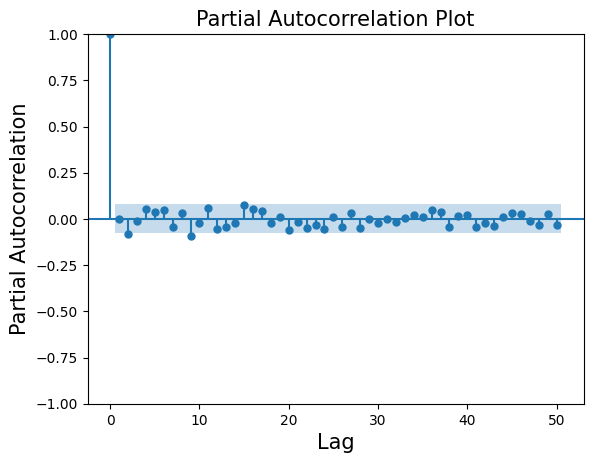

In [49]:
pacf_plot=plot_pacf(first_difference,lags=50)
plt.title("Partial Autocorrelation Plot",fontsize=15)
plt.ylabel('Partial Autocorrelation', fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.show()

In [13]:
num_split=int(data['Close'].shape[0]*0.8)
train_set=data['Close'].iloc[:num_split]
test_set=data['Close'].iloc[num_split:]
test_set

Date
2023-02-08    1874.97
2023-02-09    1862.23
2023-02-10    1865.28
2023-02-13    1854.34
2023-02-14    1854.94
               ...   
2023-06-29    1908.76
2023-06-30    1919.20
2023-07-02    1917.70
2023-07-03    1921.17
2023-07-04    1929.65
Name: Close, Length: 125, dtype: float64

In [14]:
!pip install pmdarima

In [15]:
import pmdarima as pm
model = pm.auto_arima(train_set, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4068.747, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4070.747, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4067.737, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4067.218, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4068.410, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4070.107, Time=0.17 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4071.488, Time=0.24 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4070.820, Time=0.30 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4072.308, Time=0.35 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4071.500, Time=0.29 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4072.349, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4070.747, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4070.269, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4068.340, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4068.263, Time=0.11 sec
 ARIMA(1,

In [16]:
best_order = model.order

# Get the best model summary
best_model = model.arima_res_
best_model_summary = best_model.summary()

print('Best order:', best_order)
print('Best model summary:\n', best_model_summary)

Best order: (0, 1, 3)
Best model summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  497
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2028.609
Date:                Mon, 05 Aug 2024   AIC                           4067.218
Time:                        01:44:36   BIC                           4088.251
Sample:                             0   HQIC                          4075.474
                                - 497                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1739      0.651      0.267      0.789      -1.102       1.450
ma.L1          0.0040      0.040      0.099      0.921      -0.074       0.082
ma.L2    

In [19]:
rolling_pred = test_set.copy()
for split_num in test_set.index:
    train_set = data['Close'][:split_num-timedelta(days=1)]
    model = ARIMA(train_set, order=best_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_pred[split_num] = pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarnin

Text(0.5, 0, 'Date')

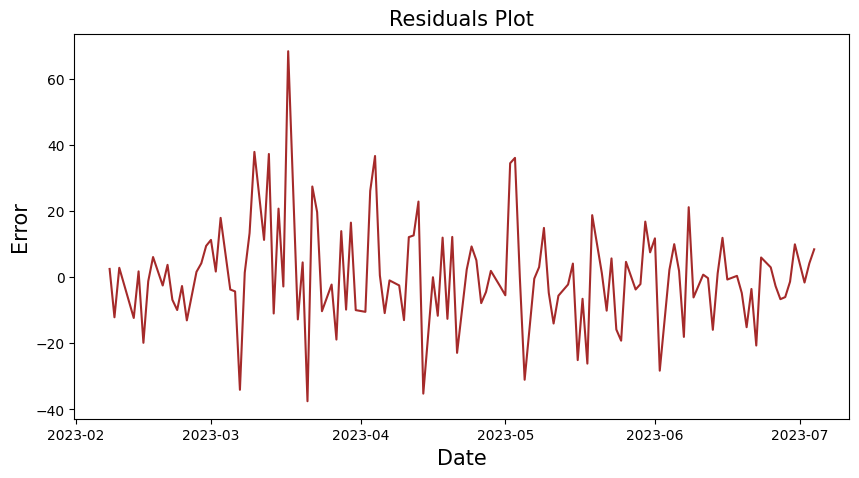

In [61]:
rolling_residuals = test_set - rolling_pred
plt.figure(figsize=(10,5))
plt.plot(rolling_residuals,color='brown')
plt.title('Residuals Plot', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xlabel("Date",fontsize=15)

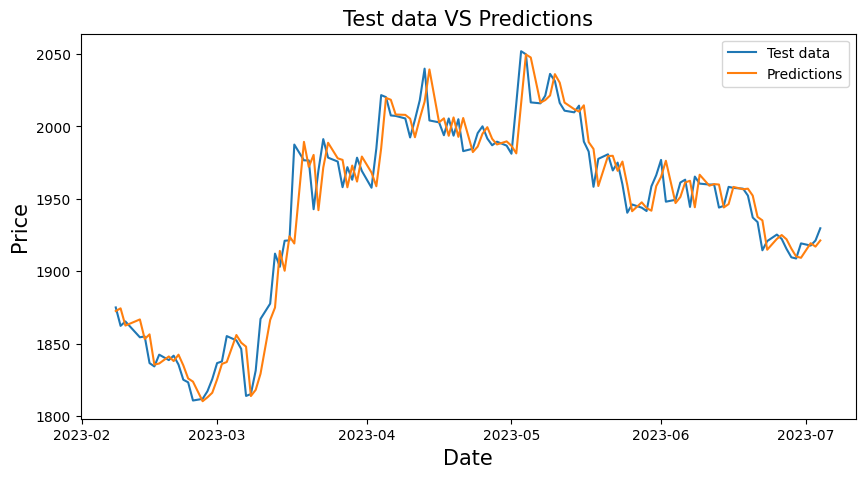

In [45]:
plt.figure(figsize=(10,5))
plt.plot(test_set.index, test_set.values, label='Test data')
plt.plot(test_set.index, rolling_pred.values, label='Predictions')
plt.title('Test data VS Predictions', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.legend()
plt.show()

In [23]:
mape = mean_absolute_percentage_error(test_set.values, rolling_pred.values)
print('MAPE:', mape)

MAPE: 0.005768216067356877


In [62]:
mape*100

0.5768216067356877